# Importando bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando arquivos csv

Os arquivos originais retornaram erro de decode na primeira tentativa de serem lidos

In [2]:
# data = pd.read_csv('cars_train.csv') --> UnicodeDecodeError

Solução: abrir arquivos originais no google sheets e fazer o download do csv novamente.

In [3]:
data = pd.read_csv('cars_train - fixed.csv')

# 1 - Análise de Features

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

Utilizando o método info(), podemos verificar que o data set possui 7 features de tipo número, 19 features de tipo object e 3 features de tipo boolean.

Observando a feature 'veiculo_alienado' percebemos que ela não possui nenhum valor não nulo na tabela, o que pode representar algum erro na coleta ou na transcrição dos dados.


Podemos observar também que as features 'num_fotos', 'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica' e 'revisoes_dentro_agenda' possuem alguns dados indisponíveis (nulos, na, NaN). Tirando a feat 'num_fotos' que é quantitativa, nas outras features, por serem qualitativas, a ausência de um valor pode significar a negação de sua característica (dependendo do contexto). Podemos confirmar essa informação checando que essas features possuem apenas um registro de valor, assim faz sentido considerá-las como variáveis booleanas (sim e não, possui e não possui, etc)

In [5]:
data[['dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago']].value_counts()

dono_aceita_troca  veiculo_único_dono  revisoes_concessionaria                       ipva_pago
Aceita troca       Único dono          Todas as revisões feitas pela concessionária  IPVA pago    1216
dtype: int64

In [6]:
data[['dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago']].value_counts()

dono_aceita_troca  veiculo_único_dono  revisoes_concessionaria                       ipva_pago
Aceita troca       Único dono          Todas as revisões feitas pela concessionária  IPVA pago    1216
dtype: int64

Utilizando o método describe(), podemos visualizar melhor como as features de tipo número estão distribuídas:

In [7]:
data.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,veiculo_alienado,preco
count,29407.000000,29584.000000,29584.000000,29584.000000,29584.000000,0.0,2.958400e+04
mean,10.323834,2016.758552,2017.808985,58430.592077,3.940677,NaN,1.330239e+05
std,3.487334,4.062422,2.673930,32561.769309,0.338360,NaN,8.166287e+04
min,8.000000,1985.000000,1997.000000,100.000000,2.000000,NaN,9.869951e+03
25%,8.000000,2015.000000,2016.000000,31214.000000,4.000000,NaN,7.657177e+04
50%,8.000000,2018.000000,2018.000000,57434.000000,4.000000,NaN,1.143558e+05
75%,14.000000,2019.000000,2020.000000,81953.500000,4.000000,NaN,1.636796e+05
max,21.000000,2022.000000,2023.000000,390065.000000,4.000000,NaN,1.359813e+06


Atentando-se ao dado de valor mínimo (min) para as features 'ano_de_fabricacao' e 'ano_modelo', surge um questionamento: **faz sentido o menor ano de fabricação registrado ser 1985 e o menor ano de modelo registrado ser 1997?** Investigando mais aprofundadamente, descobrimos que existem vários registros com ano de fabricação bem menor do que o ano de modelo

In [8]:
# Filtro carros com ano de fabricação muito abaixo do ano de modelo
filtro = (data['ano_modelo'] - data['ano_de_fabricacao']>3)

data[filtro].sort_values('ano_de_fabricacao')

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
590,317058348344627599337634039380150700902,8.0,VOLKSWAGEN,GOL,1.6 MI POWER 8V FLEX 4P MANUAL G.III,1985,2013.0,192182.0,Manual,4,...,False,NaN,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,22520.067767
19658,64369313258166945961672474305820655846,8.0,VOLKSWAGEN,FUSCA,1.6 8V GASOLINA 2P MANUAL,1988,2011.0,3548.0,Manual,4,...,False,NaN,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,28875.849751
13276,51936966583809049009169550364057097722,8.0,PEUGEOT,307,2.0 GRIFFE 16V GASOLINA 4P AUTOMÁTICO,1988,2011.0,163780.0,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,24093.833734
2032,22317396938262813942522874147555341460,8.0,VOLKSWAGEN,GOL,1.6 MI POWER 8V FLEX 4P MANUAL G.IV,1990,2010.0,146304.0,Manual,4,...,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,16782.044869
1156,120618350228284858326813530052157947976,16.0,FIAT,PALIO,1.3 MPI FIRE ELX WEEKEND 8V FLEX 4P MANUAL,1990,2013.0,171889.0,Manual,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26669.839995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21856,192248695249104148387700991312442484247,8.0,AUDI,Q3,2.0 TFSI AMBIENTE QUATTRO 4P GASOLINA S TRONIC,2013,2017.0,70557.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,230190.315427
22085,329116392430975907307979672503150816286,15.0,AUDI,Q3,2.0 TFSI AMBIENTE QUATTRO 4P GASOLINA S TRONIC,2013,2017.0,77409.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206547.855575
28980,114161983753521009958220745869816770451,8.0,TOYOTA,COROLLA,2.0 XEI 16V FLEX 4P AUTOMÁTICO,2015,2019.0,55548.0,Automática,4,...,False,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,102404.963149
3324,84217579250235874020049371593041153452,8.0,AUDI,A1,1.4 TFSI SPORTBACK SPORT EDITION 16V GASOLINA ...,2015,2019.0,60005.0,Automática,4,...,False,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,89760.071739


<Axes: >

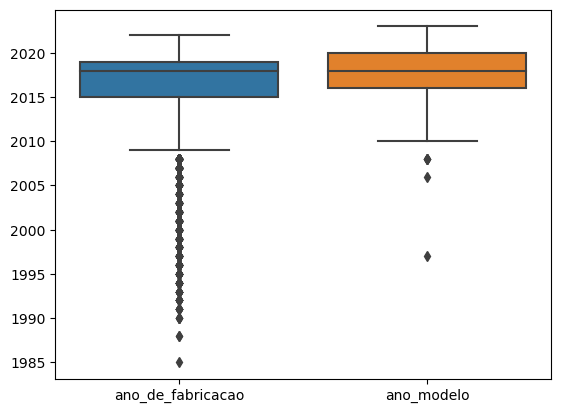

In [9]:
sub_df = data[['ano_de_fabricacao', 'ano_modelo']]
sns.boxplot(sub_df)

Pesquisando por mais informações, podemos conferir que em 2001, entrou em vigor a portaria 23/2001 aprovada pelo Departamento Nacional de Trânsito (DENATRAN) que diz que o ano de fabricação de um veículo precisa ser igual ao do seu modelo, tendo um ano de tolerância para mais ou para menos. (https://www.gov.br/transportes/pt-br/assuntos/transito/conteudo-Senatran/portarias-2001-denatran). A partir dessa informação, poderíamos investigar mais a fundo como foi feita a coleta desses dados, a fim de descobrir se houve algum erro de cadastramento ou dúvida na inserção dos dados, etc.

Outra possível abordagem para o tratamento desses dados (menos trabalhosa, porém com menos chances de se obter uma acurácia maior) seria aproximar o valor do ano de fabricação para o valor do ano de modelo ou vice e versa. 

Ainda utilizando o método describe() e desta vez observando o Desvio Padrão (std), percebe-se que os valores encontrados nas features 'hodometro' e 'preco' encontram-se bastante elevados, o que poderia ser um indicativo de outliers

<Axes: >

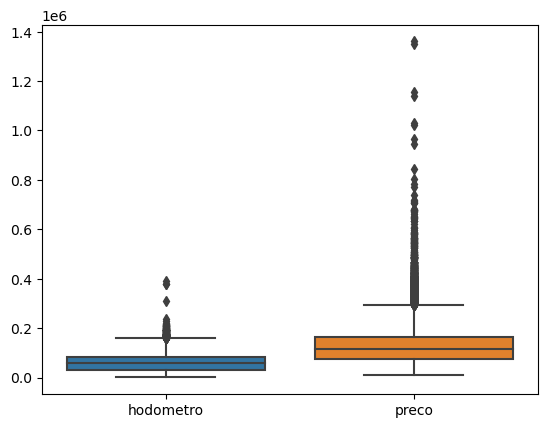

In [10]:
sub_df = data[['hodometro', 'preco']]
sns.boxplot(sub_df)

Utilizando gráficos boxplot para visualizar as duas features concluímos que de fato elas possuem vários outliers, o que pode afetar o valor da média de ambas as variáveis.

**Investigando outliers PREÇO**

<Axes: xlabel='preco', ylabel='marca'>

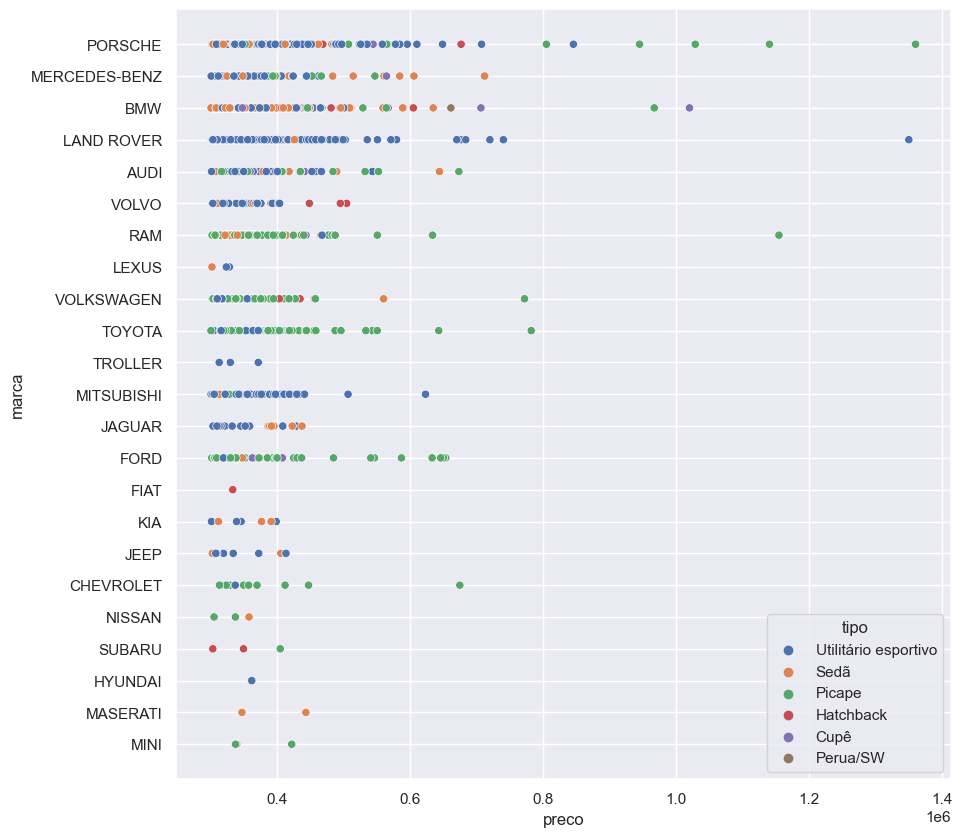

In [11]:
filtro = (data['preco'] > 300000)

outliers_preco = data[filtro]

sns.set(rc = {'figure.figsize':(10, 10)})
sns.scatterplot(outliers_preco, y='marca', x='preco', hue='tipo')

In [12]:
outliers_preco['tipo'].value_counts()

Utilitário esportivo    615
Picape                  404
Sedã                    250
Hatchback                53
Cupê                     20
Perua/SW                  3
Name: tipo, dtype: int64

In [13]:
outliers_preco['marca'].value_counts()

BMW              222
PORSCHE          185
TOYOTA           171
LAND ROVER       156
MERCEDES-BENZ    125
RAM               96
AUDI              87
VOLKSWAGEN        77
MITSUBISHI        74
VOLVO             45
FORD              42
JAGUAR            20
CHEVROLET         11
JEEP               8
KIA                7
LEXUS              3
TROLLER            3
NISSAN             3
SUBARU             3
MINI               3
MASERATI           2
FIAT               1
HYUNDAI            1
Name: marca, dtype: int64

**Investigando outliers HODOMETRO**

<Axes: xlabel='hodometro', ylabel='marca'>

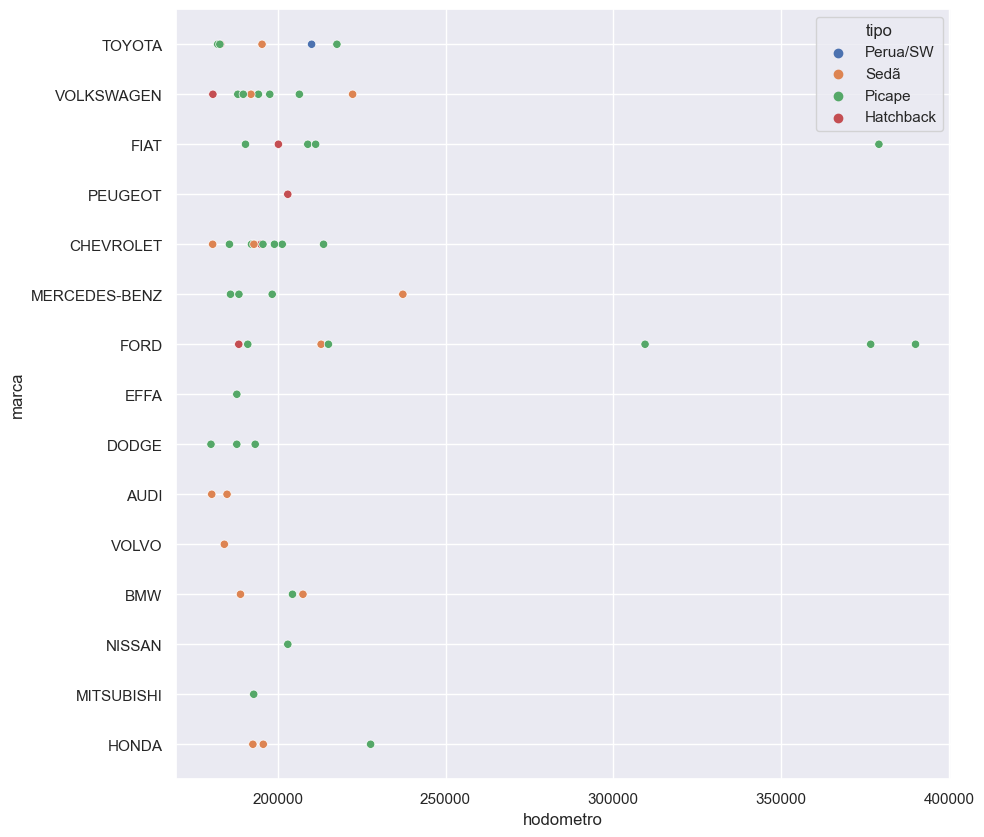

In [14]:
filtro = (data['hodometro'] > 180000)

outliers_hodometro = data[filtro]

sns.set(rc = {'figure.figsize':(10, 10)})
sns.scatterplot(outliers_hodometro, y='marca', x='hodometro', hue='tipo')